[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10526316 0.31578947
 0.52631579 0.73684211 0.94736842 1.15789474 1.36842105 1.57894737
 1.78947368 2.        ]


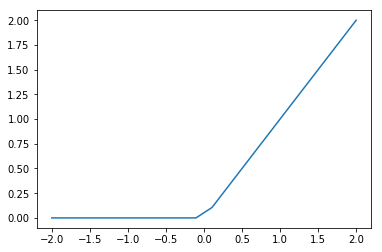

In [30]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
x = np.linspace(-2, 2, 20)
def relu(values):
    return np.maximum(values, 0)

relu_y = relu(x)

print(x)
print(relu_y)

plt.plot(x, relu_y)

In [31]:
x

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

In [32]:
relu_y

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10526316, 0.31578947, 0.52631579, 0.73684211, 0.94736842,
       1.15789474, 1.36842105, 1.57894737, 1.78947368, 2.        ])

In [33]:
a = np.random.randint(-5,5,20)
b = np.random.randint(-10,30,20)

In [34]:
a

array([-5,  0,  0, -3, -5, -4,  0,  1,  3,  0, -4, -5, -4, -1,  3,  3, -5,
       -1, -2, -3])

In [35]:
b

array([ 0, 21, 12, 14, 24,  0,  0, 24, 19, 17, 23, 29, -3,  6,  5,  7, -2,
       21,  2, 13])

In [36]:
aa=np.maximum(a,0)

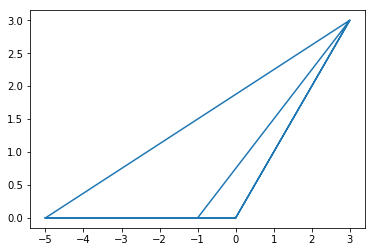

In [37]:
plt.plot(a, aa)

Text(0.5, 0, 'y')

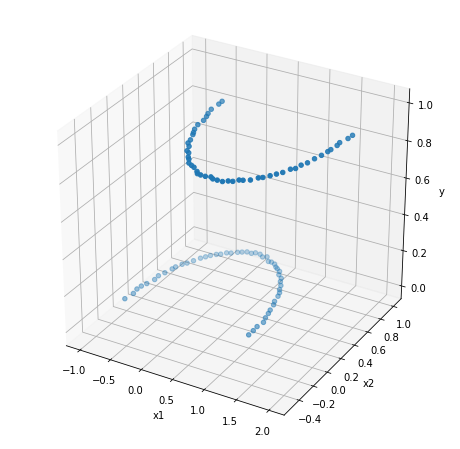

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
data = make_moons(100, random_state=3, noise=0.01)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
features["bias"] = 1

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]
mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)

lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

nn_accuracy = accuracy_score(test_labels, nn_predictions)
log_accuracy = accuracy_score(test_labels, log_predictions)

print("Logistic Regression Model Accuracy: ", log_accuracy)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy)

Logistic Regression Model Accuracy:  0.88
Single Neuron Single Layer NN Model Accuracy:  0.48


In [40]:
np.random.seed(8)
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]
neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)

[0.48, 0.78, 0.86, 0.82, 0.84, 0.86]


In [41]:
neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter=1000)
    
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)

print(nn_accuracies)

[0.52, 0.88, 1.0, 1.0, 1.0, 1.0]
